In [1]:
#import necessary moodules
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
%matplotlib inline

In [2]:
#create a data frame
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


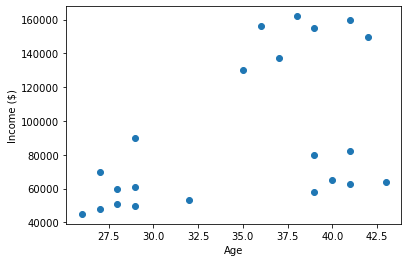

In [3]:
#visualize data using scatter plot
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.scatter(df['Age'], df['Income($)'])

In [5]:
#from above, it is clear that we have 3 clusters
Kmeans = KMeans(n_clusters=3)
y_predicted = Kmeans.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [6]:
#append the cluster to dataframe
df['clusters'] = y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


No handles with labels found to put in legend.


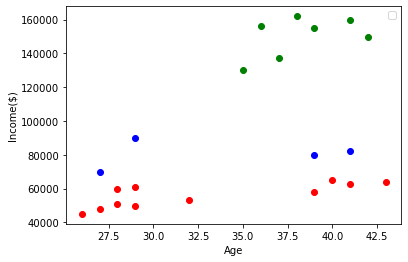

In [7]:
#group related clusters
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

#make a scatter plot of the different clusters
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [8]:
#tranfrom values to avoid mis clustering
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),clusters
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0
5,Gautam,39,0.940171,0
6,David,41,0.982906,0
7,Andrea,38,1.000000,0
8,Brad,36,0.948718,0
9,Angelina,35,0.726496,0


In [11]:
#get the centroids
Kmeans.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [12]:
#tranform age
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [49]:
#use k means algorithm on the transformed data
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [56]:
df['clusters'] = y_predicted

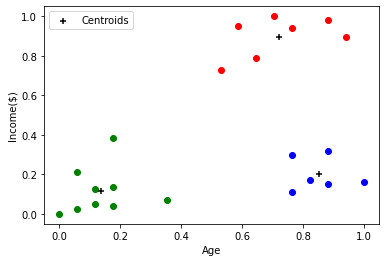

In [63]:
#group related clusters
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

#make a scatter plot of the different clusters
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='blue')

#plot the centorids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="+", color="black", label="Centroids")
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [77]:
#using the elbow technique

k_range = range(1, 10)
sse = []

for k in k_range:
    k_means = KMeans(n_clusters = k)
    k_means.fit(df[['Age', 'Income($)']])
    #attribute inertia_ gives the sum of squared error (sse)
    sse.append(k_means.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [78]:
#check sse
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3625079900797328,
 0.26217927623452125,
 0.2239580705925012,
 0.16858512236029757,
 0.13265419827245162,
 0.10497488680620906]

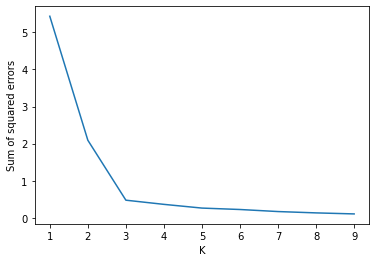

In [79]:
#plot a line graph
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_range, sse)